In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import string
import nltk
import re

In [2]:
df=pd.read_csv("Depression_Detection_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [5]:
grp = df['class'].value_counts()

<AxesSubplot:>

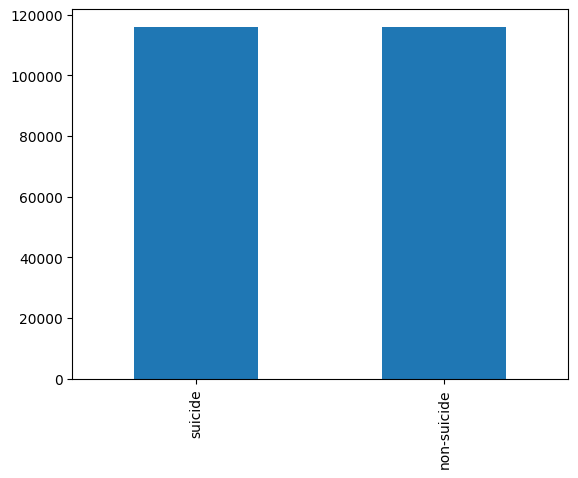

In [6]:
grp.plot(kind='bar')

In [7]:
#remove punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['clean_text']=df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,Unnamed: 0,text,class,clean_text
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I dont get affected by compliments ...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,Finally 2020 is almost over So I can never hea...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,I’m so lostHello my name is Adam 16 and I’ve b...


In [8]:
#remove hyperlink
df['clean_text'] = df['clean_text'].str.replace(r"http\S+", "") 
#remove emoji
df['clean_text'] = df['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
df['clean_text'] = df['clean_text'].str.lower()
df.head()

c:\users\abhishek sahu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\users\abhishek sahu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,Unnamed: 0,text,class,clean_text
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i dont get affected by compliments ...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 is almost over so i can never hea...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,im so losthello my name is adam 16 and ive bee...


In [9]:
#tokenization
nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['clean_text_tokenize']=df['clean_text'].apply(lambda x: tokenize(x.lower()))


[nltk_data] Downloading package punkt to C:\Users\Abhishek
[nltk_data]     Sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
# #stopwords
# nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
words = stopword
words.extend(['cant', 'im', 'dont', 'ive', 'wasnt', 'fuck', 'filler', 'cum', 'doesnt', 'couldnt', 'want', 'didnt', 'could', 'would'])
def remove_stopwords(text):
    text=[word for word in text if word not in words]
    return text
df['clean_text_tokenize_stopwords'] = df['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))

df.head(10)

,Unnamed: 0,text,class,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...,"[ex, wife, threatening, suiciderecently, i, le...","[ex, wife, threatening, suiciderecently, left,..."
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i dont get affected by compliments ...,"[am, i, weird, i, dont, get, affected, by, com...","[weird, get, affected, compliments, coming, so..."
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 is almost over so i can never hea...,"[finally, 2020, is, almost, over, so, i, can, ...","[finally, 2020, almost, never, hear, 2020, bad..."
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,"[i, need, helpjust, help, me, im, crying, so, ...","[need, helpjust, help, crying, hard]"
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,im so losthello my name is adam 16 and ive bee...,"[im, so, losthello, my, name, is, adam, 16, an...","[losthello, name, adam, 16, struggling, years,..."
5,11,Honetly idkI dont know what im even doing here...,suicide,honetly idki dont know what im even doing here...,"[honetly, idki, dont, know, what, im, even, do...","[honetly, idki, know, even, feel, like, nothin..."
6,12,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warning excuse for self inflicted burn...,"[trigger, warning, excuse, for, self, inflicte...","[trigger, warning, excuse, self, inflicted, bu..."
7,13,It ends tonight.I can’t do it anymore. \nI quit.,suicide,it ends tonighti cant do it anymore \ni quit,"[it, ends, tonighti, cant, do, it, anymore, i,...","[ends, tonighti, anymore, quit]"
8,16,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone wants to be edgy and its making me se...,"[everyone, wants, to, be, edgy, and, its, maki...","[everyone, wants, edgy, making, self, consciou..."
9,18,My life is over at 20 years oldHello all. I am...,suicide,my life is over at 20 years oldhello all i am ...,"[my, life, is, over, at, 20, years, oldhello, ...","[life, 20, years, oldhello, 20, year, old, bal..."


In [12]:
df['clean_text_tokenize_stopwords'] = df['clean_text_tokenize_stopwords'].apply(lambda x: ' '.join(x))

In [13]:
df.head()

,Unnamed: 0,text,class,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...,"[ex, wife, threatening, suiciderecently, i, le...",ex wife threatening suiciderecently left wife ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i dont get affected by compliments ...,"[am, i, weird, i, dont, get, affected, by, com...",weird get affected compliments coming someone ...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 is almost over so i can never hea...,"[finally, 2020, is, almost, over, so, i, can, ...",finally 2020 almost never hear 2020 bad year e...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,"[i, need, helpjust, help, me, im, crying, so, ...",need helpjust help crying hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,im so losthello my name is adam 16 and ive bee...,"[im, so, losthello, my, name, is, adam, 16, an...",losthello name adam 16 struggling years afraid...


In [14]:
df["label"] = np.where(df["class"]=='suicide', 1, 0)

In [15]:
df.head()

,Unnamed: 0,text,class,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords,label
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...,"[ex, wife, threatening, suiciderecently, i, le...",ex wife threatening suiciderecently left wife ...,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i dont get affected by compliments ...,"[am, i, weird, i, dont, get, affected, by, com...",weird get affected compliments coming someone ...,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 is almost over so i can never hea...,"[finally, 2020, is, almost, over, so, i, can, ...",finally 2020 almost never hear 2020 bad year e...,0
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,"[i, need, helpjust, help, me, im, crying, so, ...",need helpjust help crying hard,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,im so losthello my name is adam 16 and ive bee...,"[im, so, losthello, my, name, is, adam, 16, an...",losthello name adam 16 struggling years afraid...,1


In [16]:
new_df = pd.DataFrame()
new_df['text'] = df['clean_text_tokenize_stopwords']
new_df['label'] = df['label']
new_df.head()

,text,label
0,ex wife threatening suiciderecently left wife ...,1
1,weird get affected compliments coming someone ...,0
2,finally 2020 almost never hear 2020 bad year e...,0
3,need helpjust help crying hard,1
4,losthello name adam 16 struggling years afraid...,1


In [17]:
# print(new_df.head())
print('Label: \n', new_df['label'].value_counts())


Label: 
 1    116037
0    116037
Name: label, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X = new_df['text']
y = new_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(220470,) (11604,) (220470,) (11604,)


In [19]:
y_train.value_counts()

1    110281
0    110189
Name: label, dtype: int64

In [20]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [21]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [22]:
validation = model.predict(X_test)

In [23]:
validation1 = model.predict(X_train)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, validation1)

0.9035424320769265

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, validation)

0.889865563598759

In [26]:
print(classification_report(y_test, validation))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      5848
           1       0.83      0.98      0.90      5756

    accuracy                           0.89     11604
   macro avg       0.90      0.89      0.89     11604
weighted avg       0.90      0.89      0.89     11604



In [27]:
train = pd.DataFrame()
train['label'] = y_train
train['text'] = X_train

def predict_category(s, train=X_train, model=model):
    pred = model.predict([s])
    if pred[0]
    return 'suicide' if pred[0] == 1:

In [28]:
predict_category("I am hurting myself so badly")

1

1

In [30]:
predict_category("I'm cute")

0

In [31]:
predict_category("Today is a good day")

0

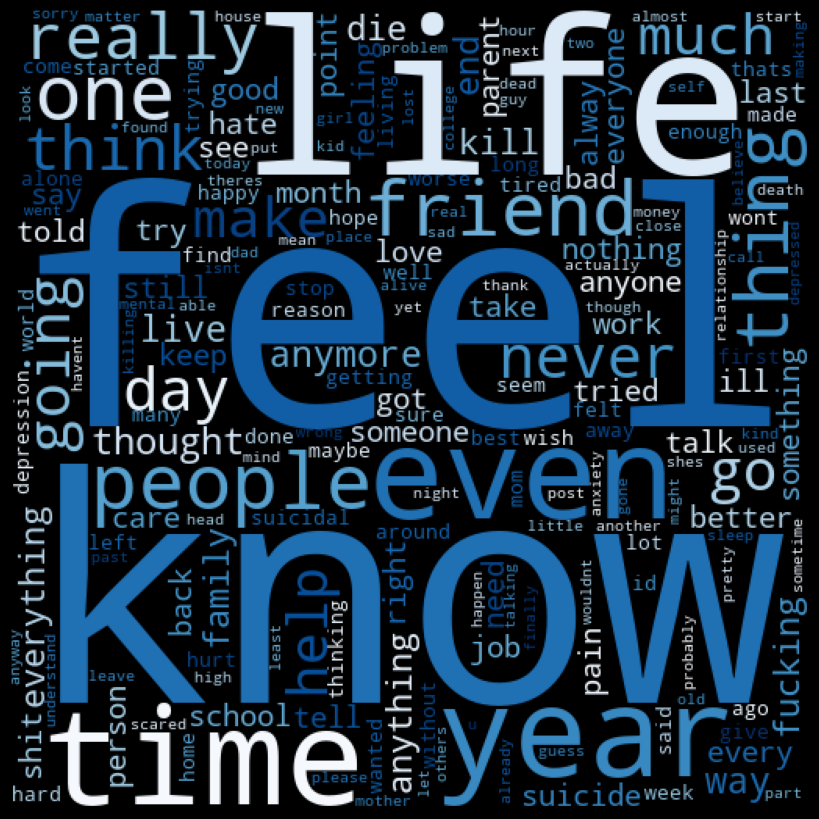

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
depressive_words = ' '.join(list(new_df[new_df['label'] == 1]['text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

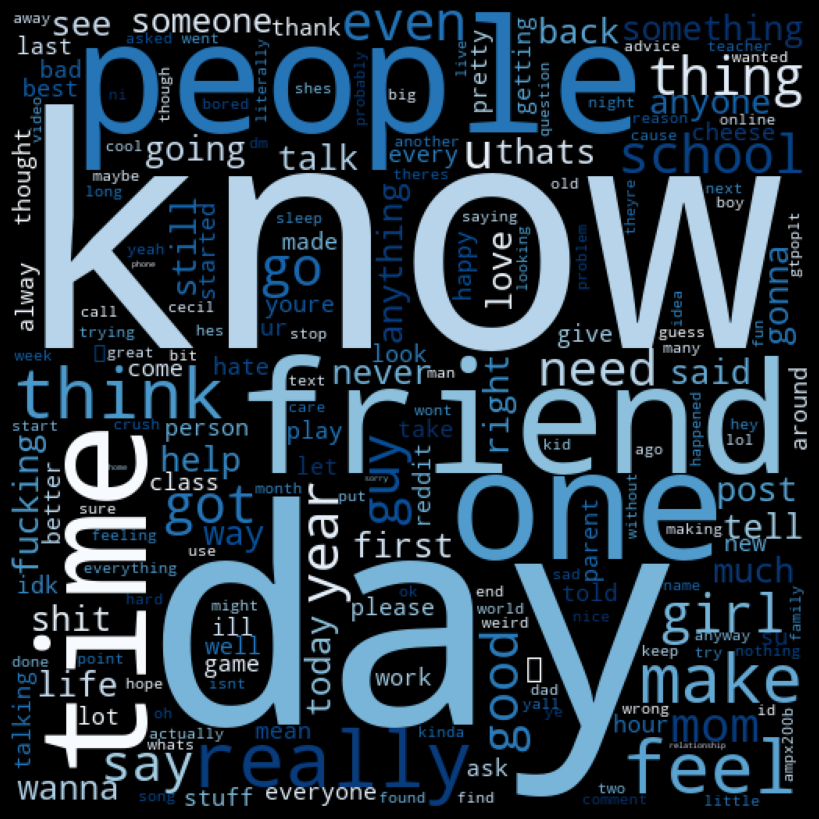

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
depressive_words = ' '.join(list(new_df[new_df['label'] == 0]['text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [34]:
import os
import pyttsx3
import speech_recognition as sr


In [35]:
def takeCommand():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        # r.pause_threshold =  0.6
        audio = r.listen(source)
        try:
            print("Recognizing...")
            query = r.recognize_google(audio, language="en-in")
            print(f"User said: {query}")
            return query
        except Exception as e:
            return "Some Error Occurred."


In [36]:
# Voice Command 

while True:
    print("Listening...")
    query = takeCommand()
    print(query)
    print(predict_category(query))
    break
    

Listening...
Recognizing...
result2:
{'alternative': [{'transcript': 'hello'}], 'final': True}
User said: hello
hello
0
